In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#sns.set(rc={'figure.figsize':(11.7,8.27)})

%matplotlib inline

In [2]:
def CategoricalPlots(data, cols, ref='accepted'):
    '''
    Plot categorical data from the DataFrame 'data' using the columns in cols.
    Split the categorical data in line with a label reference
    '''
    if not('dummy' in data.columns):
        data['dummy'] = np.ones(shape = data.shape[0])
    for col in cols:
        print(col)
        counts = data[['dummy', ref, col]].groupby([ref, col], as_index = False).count()
        _ = plt.figure(figsize = (13,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts[ref] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n not accepted')
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts[ref] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n accepted')
        plt.ylabel('count')
        plt.show()

def BoxPlots(data, columns, ref = ['accepted'], hue='accepted'):
    for column in columns:
        for r in ref:
            fig, ax = plt.subplots(figsize=(11.7,8.27))
            sns.boxplot(x=r, ax=ax, y=column, data=data, hue=hue)
            plt.xlabel(r)
            plt.ylabel(column)
            plt.show()
        
def DistPlots(data, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(11.7,8.27))
        ax = sns.distplot(data[column], ax=ax)
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Histogram of ' + column)
        plt.show()
        
def DistPlotsSplit(data, columns, ref=''):
    '''
    Plot several distributions with a reference column
    '''
    if ref != '':
        unique = data[ref].unique()
    for column in columns:
        if ref != '':
            ax = sns.distplot(data.loc[data[ref]==unique[0], column])
            ax = sns.distplot(data.loc[data[ref]==unique[1], column], ax=ax)
        else:
            ax = sns.distplot(data[column])
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Histogram of ' + column)
        plt.show()
    

In [3]:
def ReplaceNaN(data, ref, col, how='mean'):
    '''
    Replacing a NaN value with a random number from a normal distribution.
    Parameter how defines whether the value will be coming from a normal distribution "mean"
    or a simple "median" value of the reference column.
    '''
    if ref == col:
        replace_mean = data[col].mean()
        replace_std = data[col].std()
        replace_value = np.random.normal(loc=replace_mean, scale=replace_std)
        data.loc[(data[col].isnull()), col] = replace_value
    else:
        unique_values = data[ref].unique()
        if unique_values.shape[0] < 500:
            for value in unique_values:
                if how =='mean':
                    replace_mean = data[data[ref]==value][col].mean()
                    replace_std = data[data[ref]==value][col].std()
                    replace_value = np.random.normal(loc=replace_mean, scale=replace_std)
                elif how == 'median':
                    replace_value = data[data[ref]==value][col].median()
                data.loc[(data[ref]==value) & (data[col].isnull()), col] = replace_value               
        else:
            raise('ReplaceNaN: too many unique values to fill')    

from sklearn import preprocessing
            
def encode_category(numeric_category):
    ## First encode the strings to numeric categories
    #enc = preprocessing.LabelEncoder()
    #enc.fit(cat_features)
    #enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder(categories='auto')
    encoded = ohe.fit(numeric_category.values.reshape(-1,1))
    return encoded.transform(numeric_category.values.reshape(-1,1)).toarray()
            
def PrepareFeatures(data, cols):
    '''
    Use one-hot-encoder to encode the categorical features.
    The columns to encode in the dataset are defined by the cols_categorical list
    '''
    features = np.array([])
    for col in cols:
        temp = encode_category(data[col])
        if features.shape[0] == 0:
            features = temp
        else:
            features = np.concatenate([features, temp], axis = 1)
    return features

In [4]:
train_data = pd.read_csv('train_values.csv', index_col=0)
lender_classification = pd.read_csv('lender_classification.csv', index_col='lender')
train_data['lender_classification'] = train_data['lender'].apply(lambda x: lender_classification.loc[x, 'accept_rate'])
print(train_data.shape)
train_data.head()

(500000, 22)


,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,lender_classification
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,0.837209
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0.168919
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,0.489632
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,0.691964
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,0.542994


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 22 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [6]:
cols_numerical = ['loan_amount', 'applicant_income', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
                  'ffiecmedian_family_income', 'minority_population_pct', 'tract_to_msa_md_income_pct','population',
                 'lender_classification']
cols_categorical = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 
                    'applicant_ethnicity', 'applicant_race', 'applicant_sex','co_applicant']

cols_property_location = ['msa_md', 'state_code', 'county_code']

cols_lender = ['lender']

In [6]:
train_data['income_approximated'] = train_data[['loan_amount','applicant_income']].apply(lambda x: 30.29 + 0.3458 * x[0] if (np.all(pd.isnull(x[1]))) else x[1], axis = 1)
#ReplaceNaN(train_data, 'msa_md', 'applicant_income', how='mean')

#train_data['is_minority'] = train_data['applicant_race'].apply(lambda x: 0 if x==5 else 1)

#train_data['number_of_1_to_4_family_units'].fillna(method='ffill', inplace=True)
#train_data['number_of_owner-occupied_units'].fillna(method='ffill', inplace=True)

train_data['number_of_1_to_4_family_units'].fillna(value = -1, inplace=True)
train_data['number_of_owner-occupied_units'].fillna(value = -1, inplace=True)

In [9]:
train_data[['applicant_income', 'income_approximated', 'is_minority']].head(20)

,applicant_income,income_approximated,is_minority
row_id,,,
0,24.0,24.0000,0
1,57.0,57.0000,0
2,67.0,67.0000,0
3,105.0,105.0000,0
4,71.0,71.0000,1
5,51.0,51.0000,0
6,104.0,104.0000,0
7,55.0,55.0000,0
8,244.0,244.0000,0


In [ ]:
DistPlots(train_data, ['number_of_owner-occupied_units', 'number_of_1_to_4_family_units'])

In [11]:
train_labels = pd.read_csv('train_labels.csv', index_col=0)
data = train_data.merge(train_labels, on='row_id')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 24 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [ ]:
# lest just drop all the columns with missing data and see where we get
#data.drop(data[data[['applicant_income']].isna().all(axis=1)].index, inplace=True)
#data.info()

drop=data.dropna(axis=0, subset=['number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
                  'ffiecmedian_family_income', 'minority_population_pct', 'tract_to_msa_md_income_pct','population']).shape
print((data.shape[0] - drop[0])/data.shape[0] )

In [ ]:
data.dropna(axis=0, subset=['number_of_owner-occupied_units', 
                            'number_of_1_to_4_family_units',
                            'ffiecmedian_family_income',
                            'minority_population_pct',
                            'tract_to_msa_md_income_pct',
                            'population'], 
                            inplace=True)

In [ ]:
BoxPlots(data, cols_numerical, hue='applicant_ethnicity')

In [ ]:
#log_cols_numerical = ['log_' + x for x in cols_numerical]
cols_to_log =  ['loan_amount']
log_cols_numerical = ['log_' + x for x in cols_to_log]

print(log_cols_numerical)

data[log_cols_numerical] = data[cols_to_log].applymap(math.log)

In [ ]:
DistPlots(data, ['log_loan_amount', 'applicant_income'])

In [ ]:
data.head()

## Model fitting

In this section the actual model fitting takes place.

In [51]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.ensemble as ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import feature_selection as fs
import sklearn.tree as tree

In [35]:
#if not('lender_size' in cols_categorical):
#    cols_categorical.extend(['lender_size'])
#cols_categorical

cat_features_to_test = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval','co_applicant']

cat_features_to_test2 = ['loan_purpose', 
                        'preapproval', 
                        'applicant_ethnicity', 
                        'applicant_sex', 
                        'co_applicant',
                        'is_minority'
                       ]

cat_features_to_hash = ['state_code', 'county_code']

In [36]:
#features = PrepareFeatures(data, cols_categorical)
features_to_test = PrepareFeatures(data, cat_features_to_test)

features_to_add = ['co_applicant',
                   'loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'state_code',
                   'county_code',
                   'number_of_owner-occupied_units',
                   'number_of_1_to_4_family_units'
                  ]

features_to_test = np.concatenate([features_to_test, np.array(data[features_to_add])], axis = 1)

minmaxscaler = preprocessing.StandardScaler().fit(features_to_test[:, 19:])
features_to_test[:, 19:] = minmaxscaler.transform(features_to_test[:, 19:])
features_to_test[:10,:]

X_train, X_test, y_train, y_test = train_test_split(features_to_test, data['accepted'], test_size=0.3) # 70% training and 30% test

C:\Users\Tomas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Tomas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
features_to_test.shape

(500000, 26)

In [38]:
abc = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
model_abc = abc.fit(X_train, y_train)
y_pred = model_abc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71294


In [39]:
rfc = RandomForestClassifier(n_estimators=500,max_features=0.25, n_jobs=7,
                                criterion="entropy", class_weight="balanced")
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7202466666666667


In [41]:
metrics.confusion_matrix(y_test, y_pred)

array([[50832, 24107],
       [17856, 57205]], dtype=int64)

In [49]:
rfc = RandomForestClassifier(n_estimators=100, max_features=0.25, n_jobs=7,
                                criterion="entropy", class_weight="balanced")
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71716


In [43]:
metrics.confusion_matrix(y_test, y_pred)

array([[50873, 24066],
       [17937, 57124]], dtype=int64)

In [45]:
rfc = RandomForestClassifier(n_estimators=500, n_jobs=7,
                                criterion="entropy", class_weight={0:0.6, 1:0.4})
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71964


In [46]:
metrics.confusion_matrix(y_test, y_pred)

array([[52207, 22732],
       [19322, 55739]], dtype=int64)

In [54]:
etc = ensemble.ExtraTreesClassifier(n_estimators = 500, n_jobs=7)
model_etc = etc.fit(X_train, y_train)
y_pred = model_etc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7093733333333333


In [ ]:
import category_encoders as ce

smpl = data.sample(100000)
    
num_features_to_test = ['property_type',
                        'loan_purpose', 
                        'preapproval', 
                        'applicant_ethnicity', 
                        'applicant_race', 
                        'applicant_sex',
                         'co_applicant'
                         'msa_md'
                         'state_code',
                         'county_code']

features_num = ['loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'number_of_owner-occupied_units',
                   'number_of_1_to_4_family_units',
                   'accepted']


hasher = ce.HashingEncoder(cols = num_features_to_test, n_components=70)
data_encoded = hasher.fit_transform(smpl)

features = data_encoded.iloc[:,0:70]

features = features.merge(data[features_num], on='row_id')
features.shape

X_train, X_test, y_train, y_test = train_test_split(features.iloc[:,0:70+5], features['accepted'], test_size=0.3) # 70% training and 30% test

for n in range(2,11,1):
    mlp = MLPClassifier(hidden_layer_sizes = (100,n), activation='logistic')
    model_mlp = mlp.fit(X_train, y_train)

    y_pred = model_mlp.predict(X_test)

    print('Depth:', n,"Accuracy:", metrics.accuracy_score(y_test, y_pred))


Using a cycle for the number of components in the resulting hash columns from 10 until 200 and by applying an AdaBoostClassifier(n_estimators=250, learning_rate=0.1), the resulting accuracy is as follows:

-  n= 10 Accuracy: 0.7017666666666666
-  n= 20 Accuracy: 0.7078
-  n= 30 Accuracy: 0.7077666666666667
-  n= 40 Accuracy: 0.7084
-  n= 50 Accuracy: 0.7127333333333333
-  n= 60 Accuracy: 0.7099
-  n= 70 Accuracy: 0.7135
-  n= 80 Accuracy: 0.7084333333333334
-  n= 90 Accuracy: 0.7105666666666667
-  n= 100 Accuracy: 0.7060333333333333
-  n= 110 Accuracy: 0.7055
-  n= 120 Accuracy: 0.7077333333333333
-  n= 130 Accuracy: 0.7022333333333334
-  n= 140 Accuracy: 0.7043333333333334
-  n= 150 Accuracy: 0.7045333333333333
-  n= 160 Accuracy: 0.7073666666666667
-  n= 170 Accuracy: 0.7005333333333333
-  n= 180 Accuracy: 0.7032
-  n= 190 Accuracy: 0.7053333333333334
-  n= 200 Accuracy: 0.707033333333333

It seems that the highest accuracy is achieved by the n_estimators = 70

Using a MPClassifier, changing the the activation from default to logistic improved the accuracy from 0.69 to 0.71.
Changing the hiddle_layer_sizes from 100 to 150 lowered the accuracy score significantly, from 0.71 to 0.68

In [ ]:
data_encoded.iloc[:,0:15].head(50)

In [ ]:
features = data_encoded.iloc[:,0:10]
features_num = ['loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'number_of_owner-occupied_units',
                   'number_of_1_to_4_family_units',
                   'accepted']
features = features.merge(data[features_num], on='row_id')
features.shape

X_train, X_test, y_train, y_test = train_test_split(features.iloc[:,0:15], features['accepted'], test_size=0.3) # 70% training and 30% test

In [ ]:
rfc_large = RandomForestClassifier(n_estimators=500, max_features=0.25,
                                criterion="entropy", class_weight="balanced")
model_rfc_large = rfc_large.fit(X_train, y_train)
y_pred = model_rfc_large.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
model_rfc_large.feature_importances_

In [ ]:
abc = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
model_abc = abc.fit(X_train, y_train)
y_pred = model_abc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [14]:
features_v7 = ['loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'state_code',
                   'number_of_owner-occupied_units'
              ]

features_to_add = ['co_applicant',
                   'loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'state_code',
                   'county_code',
                   'number_of_owner-occupied_units',
                   'number_of_1_to_4_family_units'
                  ]


In [24]:
features_to_test = np.concatenate([features_to_test, np.array(data[features_to_add])], axis = 1)

In [25]:
features_to_test.shape

(500000, 26)

In [26]:
minmaxscaler = preprocessing.MinMaxScaler().fit(features_to_test[:, 19:])
features_to_test[:, 19:] = minmaxscaler.transform(features_to_test[:, 19:])
features_to_test[:10,:]

C:\Users\Tomas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 1.0, 1.0, 0.0, False, 0.0006840013085242424,
        0.0006587822386259127, 0.8372093023255814, 0.7169811320754716,
        0.76, 0.08173734610123119, 0.19399588960657663],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 1.0, 1.0, 0.0, False, 0.0017546120523013176,
        0.0016039915375239612, 0.16891891891891891, 1.0,
        0.9230769230769231, 0.1850205198358413, 0.15480035231943629],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 1.0, 1.0, 0.0, False, 0.0016059161156656127,
        0.0018904185977960972, 0.4896318407960199, 0.20754716981132074,
        0.9446153846153846, 0.08675330597355221, 0.07699647680563712],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 0.0, 1.0, True, 0.00152661161612657,
        0.0029788414268302143, 0.6919642857142857, 0.90566037

In [ ]:
print(features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.9 * (1 - .9)))
features_reduced = sel.fit_transform(features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(features_reduced.shape)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features_to_test, data['accepted'], test_size=0.4) # 70% training and 30% test

In [29]:
abc = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
model_abc = abc.fit(X_train, y_train)
y_pred = model_abc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.712775


In [30]:
model_abc.feature_importances_

array([0.   , 0.056, 0.   , 0.008, 0.   , 0.016, 0.   , 0.084, 0.024,
       0.   , 0.   , 0.024, 0.   , 0.   , 0.016, 0.   , 0.028, 0.008,
       0.004, 0.068, 0.16 , 0.316, 0.096, 0.   , 0.072, 0.02 ])

In [31]:
rfc = RandomForestClassifier(n_estimators=500,max_features=0.25, n_jobs=7,
                                criterion="entropy", class_weight="balanced")
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.719645


In [32]:
model_rfc.feature_importances_

array([0.00538707, 0.00451853, 0.0037426 , 0.00119373, 0.00310923,
       0.00380315, 0.00035662, 0.01387806, 0.0041958 , 0.00611585,
       0.0041452 , 0.00413217, 0.00046432, 0.00328947, 0.00355778,
       0.00499647, 0.00281881, 0.00239807, 0.00229865, 0.12998585,
       0.12821327, 0.21150334, 0.08375047, 0.10573228, 0.13334499,
       0.13306823])

In [33]:
rfc2 = RandomForestClassifier(n_estimators=500,max_features=0.25, n_jobs=7,
                              criterion='entropy', class_weight={0:0.1, 1:0.9})
model_rfc2 = rfc2.fit(X_train, y_train)
y_pred = model_rfc2.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71819


In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[69764, 30583],
       [25779, 73874]], dtype=int64)

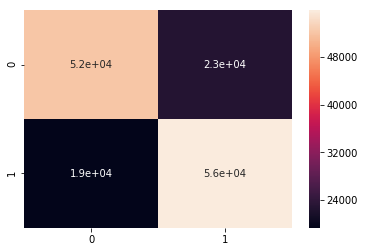

In [155]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [47]:
model_rfc2.feature_importances_

array([0.00670867, 0.00560977, 0.00491014, 0.00137961, 0.0026791 ,
       0.00310775, 0.00024237, 0.0107644 , 0.00326387, 0.004708  ,
       0.00435327, 0.00437131, 0.00035767, 0.00304016, 0.00424461,
       0.00474847, 0.00373062, 0.00475839, 0.0026361 , 0.00080131,
       0.00092245, 0.00228131, 0.00253162, 0.00071351, 0.00313436,
       0.00212993, 0.00080287, 0.00906609, 0.00888658, 0.00194704,
       0.00087898, 0.00927379, 0.00314838, 0.11394992, 0.11258087,
       0.18704397, 0.07829692, 0.07278866, 0.0951159 , 0.10910935,
       0.1089819 ])

The clasifier below has so far provided the highest accuracy after the submission - 0.7173. The actual accuracy on the train data is 0.7235, therefore there is some overfitting. The file is "submission_v6.csv" which contains the fitted information

In [ ]:
rfc_large = RandomForestClassifier(n_estimators=700, max_features=0.25,
                                criterion="entropy", class_weight="balanced")
model_rfc_large = rfc_large.fit(X_train, y_train)
y_pred = model_rfc_large.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
model_rfc_large.feature_importances_

In [50]:
lr = linear_model.LogisticRegression(penalty='l1', C=1000, solver='liblinear', class_weight={0:0.55, 1:0.45}, n_jobs=7) 
model_rl = lr.fit(X_train, y_train)

y_pred = model_rl.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

C:\Users\Tomas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy: 0.69826


In [ ]:
etc = ensemble.BaggingClassifier()
model_etc = etc.fit(X_train, y_train)

y_pred = model_etc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
mlp = MLPClassifier()
model_mlp = mlp.fit(X_train, y_train)

y_pred = model_mlp.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

### Hyperparameter optimization

In [ ]:
np.random.seed(23423)
inside = ms.KFold(n_splits=10, shuffle=True)
np.random.seed(73743)
outside = ms.KFold(n_splits=10, shuffle=True)

In [ ]:
np.random.seed(34543)
# Hyperparameters for AdaBoostClassifier
parameter_grid = {'n_estimators': [200, 250, 400, 500, 700],
                  'max_features': [0.1, 0.25, 0.5, 1]}
rfc_mdl = RandomForestClassifier(criterion="entropy", class_weight="balanced")

clf = ms.GridSearchCV(estimator=rfc_mdl, 
                      param_grid = parameter_grid, 
                      cv=inside, 
                      scoring = 'accuracy',
                      return_train_score = True
                     )

In [ ]:
data_samples = data.sample(50000)
sample_features = PrepareFeatures(data_samples, cols_categorical)

sample_features = np.concatenate([sample_features, np.array(data_samples[features_to_add])], axis = 1)

clf.fit(sample_features, data_samples['accepted'])

In [ ]:
keys = list(clf.cv_results_.keys())
for key in keys[6:16]:
    print(clf.cv_results_[key])
## And print the best parameter value
print('n_estimators', clf.best_estimator_.n_estimators)
print('max_features', clf.best_estimator_.max_features)


[{'max_features': 0.1, 'n_estimators': 200}, {'max_features': 0.1, 'n_estimators': 250}, {'max_features': 0.1, 'n_estimators': 400}, {'max_features': 0.1, 'n_estimators': 500}, {'max_features': 0.1, 'n_estimators': 700}, {'max_features': 0.25, 'n_estimators': 200}, {'max_features': 0.25, 'n_estimators': 250}, {'max_features': 0.25, 'n_estimators': 400}, {'max_features': 0.25, 'n_estimators': 500}, {'max_features': 0.25, 'n_estimators': 700}, {'max_features': 0.5, 'n_estimators': 200}, {'max_features': 0.5, 'n_estimators': 250}, {'max_features': 0.5, 'n_estimators': 400}, {'max_features': 0.5, 'n_estimators': 500}, {'max_features': 0.5, 'n_estimators': 700}, {'max_features': 1, 'n_estimators': 200}, {'max_features': 1, 'n_estimators': 250}, {'max_features': 1, 'n_estimators': 400}, {'max_features': 1, 'n_estimators': 500}, {'max_features': 1, 'n_estimators': 700}]
[0.7022 0.704  0.703  0.704  0.7038 0.7052 0.7084 0.7078 0.711  0.71
 0.7062 0.709  0.7076 0.7084 0.7062 0.6956 0.6928 0.6984 0.6994 0.6992]
[0.7118 0.7112 0.7146 0.7148 0.7138 0.714  0.713  0.712  0.7152 0.7132
 0.7114 0.7154 0.7118 0.7088 0.7138 0.7064 0.7098 0.7108 0.7132 0.7102]
[0.7232 0.7276 0.727  0.7268 0.7264 0.7244 0.7258 0.7244 0.7294 0.7266
 0.7256 0.7238 0.7252 0.726  0.7272 0.7116 0.7156 0.719  0.717  0.7154]
[0.7062 0.71   0.706  0.7076 0.7092 0.7116 0.7126 0.7116 0.7118 0.7152
 0.7082 0.71   0.7114 0.714  0.7148 0.7042 0.71   0.7064 0.7048 0.7058]
[0.7246 0.7274 0.7246 0.725  0.7248 0.7244 0.727  0.7274 0.7256 0.7248
 0.722  0.7236 0.723  0.7214 0.723  0.7216 0.7164 0.7218 0.72   0.7186]
[0.714  0.7102 0.7142 0.7148 0.7116 0.7164 0.7164 0.7166 0.7146 0.715
 0.7154 0.7142 0.7156 0.713  0.71   0.7004 0.7006 0.7092 0.7076 0.7042]
[0.7152 0.7162 0.7154 0.7178 0.7166 0.72   0.7194 0.7178 0.718  0.7176
 0.7102 0.71   0.7108 0.7114 0.712  0.7122 0.7128 0.7094 0.7156 0.7126]
[0.7156 0.7176 0.7178 0.7146 0.7184 0.7148 0.7164 0.7174 0.7172 0.7198
 0.713  0.7138 0.7162 0.7162 0.7178 0.7096 0.711  0.7106 0.7112 0.7132]
[0.7148 0.713  0.715  0.7146 0.7142 0.7162 0.7214 0.7222 0.7194 0.7214
 0.7186 0.721  0.7198 0.721  0.7216 0.7044 0.7054 0.7026 0.7016 0.704 ]
n_estimators 700
max_features 0.25

# Fitting the test data

In [69]:
test_data = pd.read_csv('test_values.csv', index_col=0)
print(test_data.shape)
lender_classification = pd.read_csv('lender_classification.csv', index_col='lender')
test_data['lender_classification'] = test_data['lender'].apply(lambda x: lender_classification.loc[x, 'accept_rate']
                                                              if x in lender_classification.index else 0.5)

#test_data['lender_size'] = test_data['lender'].apply(ClassifyLender, args=[test_data['lender'].value_counts()])
test_data['is_minority'] = test_data['applicant_race'].apply(lambda x: 0 if x==5 else 1)

#ReplaceNaN(test_data, 'msa_md', 'applicant_income', how='mean')
test_data['income_approximated'] = test_data[['loan_amount','applicant_income']].apply(lambda x: 30.29 + 0.3458 * x[0] if (np.all(pd.isnull(x[1]))) else x[1], axis = 1)
test_data['number_of_1_to_4_family_units'].fillna(method='ffill', inplace=True)
test_data['number_of_owner-occupied_units'].fillna(method='ffill', inplace=True)


cols_categorical = ['loan_type', 'property_type', 'loan_purpose', 'preapproval', 
                    'applicant_ethnicity', 'applicant_sex']

features_to_add = ['loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'msa_md',
                   'state_code',
                   'county_code',
                   'number_of_owner-occupied_units',
]

test_data.info()

test_features = PrepareFeatures(test_data, cols_categorical)
print(test_features.shape)

test_features = np.concatenate([test_features, np.array(test_data[['co_applicant', 
                                                                   'is_minority',
                                                                   'loan_amount',
                                                                   'income_approximated',
                                                                   'lender_classification',
                                                                   'state_code',
                                                                   'number_of_owner-occupied_units'
                                                                  ]])], axis = 1)

print(test_features.shape)


(500000, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 24 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  459859 non-null float64
population                        477520 non-null float64
minority_population_pct           477518 non-null float64
ffiecmedian_family_income   

In [82]:
y_test_pred = model_rfc2.predict(test_features)

In [83]:
series = pd.Series(y_test_pred)

In [84]:
series.value_counts()

1    262612
0    237388
dtype: int64

In [73]:
test_output = pd.DataFrame(columns=['row_id', 'accepted'])
test_output['accepted'] = series
test_output['row_id'] = test_output.index
test_output= test_output.set_index('row_id')
test_output.head()

,accepted
row_id,
0,1
1,1
2,0
3,1
4,0


In [74]:
test_output.to_csv('submission-v9.csv')